## Bengaluru House Price Prediction
The dataset focuses on predicting house prices in Bengaluru based on various factors. Here is a brief explanation of the features:  
1. **area_type**: Indicates the type of area, such as Super Built-up Area, Plot Area, Carpet Area, etc.  
2. **availability**: Specifies the availability status of the property (e.g., Ready To Move or date of possession).  
3. **location**: The location of the property within Bengaluru.  
4. **size**: The size of the property, typically represented as the number of bedrooms (e.g., 2 BHK, 3 BHK).  
5. **society**: The name of the housing society or residential complex (if available).  
6. **total_sqft**: The total area of the property in square feet.  
7. **bath**: The number of bathrooms in the property.  
8. **balcony**: The number of balconies in the property.  
9. **price**: The price of the property, which is the target variable for prediction.  

This dataset can be used to explore the relationship between these features and property prices, helping build regression models for price prediction. It also offers opportunities to analyze trends in the real estate market of Bengaluru.

### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

- Total 13,320 datapoints and 9 features

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [9]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [10]:
df['location'].nunique()

1305

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [13]:
df['society'].nunique()

2688

In [14]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
df['total_sqft'].nunique()

2117

In [16]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [17]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

- By observing the values of each feature availability and society from the dataset.

In [18]:
df.drop(['availability','society'],axis=1,inplace=True)

### Handling the Missing Values

In [19]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [20]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


- The size feature have different values but all values indicate the BHK, so convert the all values into integer.

In [21]:
df['BHK']=df['size'].str.split(" ").str[0]

In [22]:
df[df['BHK'].isnull()]

,area_type,location,size,total_sqft,bath,balcony,price,BHK
579,Plot Area,Sarjapur Road,NaN,1200 - 2400,NaN,NaN,34.185,NaN
1775,Plot Area,IVC Road,NaN,2000 - 5634,NaN,NaN,124.000,NaN
2264,Plot Area,Banashankari,NaN,2400,NaN,NaN,460.000,NaN
2809,Plot Area,Sarjapur Road,NaN,1200 - 2400,NaN,NaN,28.785,NaN
2862,Plot Area,Devanahalli,NaN,1500 - 2400,NaN,NaN,46.800,NaN
5333,Plot Area,Devanahalli,NaN,2100 - 5405,NaN,NaN,177.115,NaN
6423,Plot Area,Whitefield,NaN,2324,NaN,NaN,26.730,NaN
6636,Plot Area,Jigani,NaN,1500,NaN,NaN,25.490,NaN
6719,Plot Area,Hoskote,NaN,800 - 2660,NaN,NaN,28.545,NaN
7680,Plot Area,Kasavanhalli,NaN,5000,NaN,NaN,400.000,NaN


In [23]:
df["BHK"].fillna(-1,inplace=True)

In [24]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [25]:
df.drop("size",axis=1,inplace=True)
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [26]:
print(df["BHK"].unique())
df['BHK']=df['BHK'].astype(int)

['2' '4' '3' '6' '1' '8' '7' '5' '11' '9' -1 '27' '10' '19' '16' '43' '14'
 '12' '13' '18']


In [27]:
df['BHK'].fillna(df['BHK'].median(),inplace=True)

In [28]:
median_value = df['BHK'][df['BHK'] != -1].median()
df['BHK'] = df['BHK'].replace(-1, median_value)

In [29]:
df.isnull().sum()

area_type       0
location        1
total_sqft      0
bath           73
balcony       609
price           0
BHK             0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
 6   BHK         13320 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 728.6+ KB


In [31]:
df['balcony'].fillna(df['balcony'].median(),inplace=True)

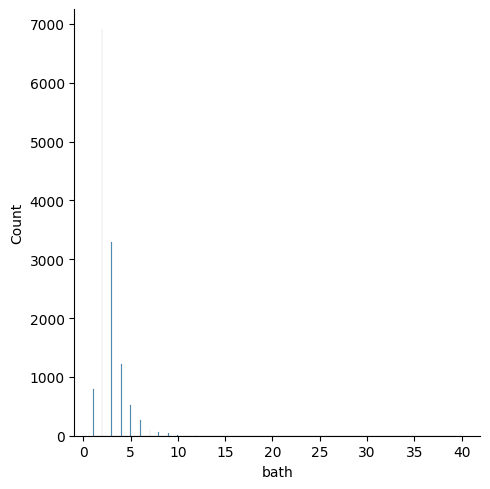

In [32]:
sns.displot(df['bath'])

In [33]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [34]:
df['bath'].fillna(df['bath'].median(),inplace=True)

In [35]:
df.isnull().sum()

area_type     0
location      1
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

In [36]:
df.dropna(inplace=True)

### Feature Engineering
- By the Observation, BHKand bathroom are have some outliers

In [37]:
df[df['BHK']>20]

,area_type,location,total_sqft,bath,balcony,price,BHK
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,2400,40.0,0.0,660.0,43


In [38]:
df.drop([1718,4684],inplace=True)

In [39]:
df[df['bath']>20]

,area_type,location,total_sqft,bath,balcony,price,BHK


In [40]:
df.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13317 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13317 non-null  object 
 1   location    13317 non-null  object 
 2   total_sqft  13317 non-null  object 
 3   bath        13317 non-null  float64
 4   balcony     13317 non-null  float64
 5   price       13317 non-null  float64
 6   BHK         13317 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 832.3+ KB


In [42]:
df.head(50)

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,2
6,Super built-up Area,Old Airport Road,2732,4.0,2.0,204.00,4
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,4
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,3
9,Plot Area,Gandhi Bazar,1020,6.0,2.0,370.00,6


- total_sqft features some range vaules and some values with units also. convert them all range values by average value of range.

In [43]:
notdigits=df[~df['total_sqft'].str.isdigit()]

In [44]:
notdigits.head(50)

,area_type,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
44,Super built-up Area,Kanakpura Road,1330.74,2.0,2.0,91.790,2
56,Built-up Area,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
142,Super built-up Area,Kasavanhalli,1563.05,3.0,1.0,105.000,3
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,1520 - 1740,2.0,2.0,74.820,3


In [45]:
df[~df['total_sqft'].str.isdigit()]['total_sqft'].unique()

array(['2100 - 2850', '1330.74', '3010 - 3410', '2957 - 3450',
       '3067 - 8156', '1042 - 1105', '1563.05', '1145 - 1340',
       '1015 - 1540', '1520 - 1740', '2023.71', '1113.27',
       '34.46Sq. Meter', '1752.12', '1195 - 1440', '1200 - 2400',
       '4125Perch', '1120 - 1145', '4400 - 6640', '3090 - 5002',
       '4400 - 6800', '1160 - 1195', '1000Sq. Meter', '4000 - 5249',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '3606 - 5091', '650 - 665', '633 - 666', '2112.95', '5.31Acres',
       '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093',
       '1440 - 1884', '1558.67', '3467.86', '716Sq. Meter',
       '547.34 - 827.31', '804.1', '580 - 650', '3425 - 3435', '1269.72',
       '1804 - 2273', '3630 - 3800', '660 - 670', '1500Sq. Meter',
       '620 - 933', '142.61Sq. Meter', '2695 - 2940', '2000 - 5634',
       '1574Sq. Yards', '3450 - 3472', '2479.13', '2172.65', '581.91',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
   

In [46]:
df[~df['total_sqft'].str.isdigit()]['total_sqft'].value_counts()

total_sqft
2830 - 2882    5
1752.12        4
2087.01        3
3630 - 3800    3
1777.26        3
              ..
910.2          1
1974 - 2171    1
2006.8         1
888 - 1290     1
1133 - 1384    1
Name: count, Length: 295, dtype: int64

In [47]:
df2=df.copy()

In [48]:
def convert_total_sqft(x):
    arr=x.split('-')
    if len(arr)==2:
        return (float(arr[0])+float(arr[1]))/2
    try:
        return float(x)
    except:
        return None

In [49]:
convert_total_sqft('2323')

2323.0

In [50]:
convert_total_sqft('2323-2222')

2272.5

In [51]:
df2['total_sqft']=df2['total_sqft'].apply(convert_total_sqft)

In [52]:
df2.head(50)

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.00,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.00,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.00,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.00,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.00,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,1170.00,2.0,1.0,38.00,2
6,Super built-up Area,Old Airport Road,2732.00,4.0,2.0,204.00,4
7,Super built-up Area,Rajaji Nagar,3300.00,4.0,2.0,600.00,4
8,Super built-up Area,Marathahalli,1310.00,3.0,1.0,63.25,3
9,Plot Area,Gandhi Bazar,1020.00,6.0,2.0,370.00,6


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13317 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13317 non-null  object 
 1   location    13317 non-null  object 
 2   total_sqft  13271 non-null  float64
 3   bath        13317 non-null  float64
 4   balcony     13317 non-null  float64
 5   price       13317 non-null  float64
 6   BHK         13317 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 832.3+ KB


- Create a new feature price per sqft by price and total_sqft features

In [54]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']

In [55]:
df2.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [56]:
df2.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13271.000000,13317.000000,13317.000000,13317.000000,13317.000000,1.327100e+04
mean,1559.075031,2.684163,1.603589,112.517695,2.799129,7.906595e+03
std,1237.261058,1.282071,0.802910,148.909244,1.228836,1.064415e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.267062e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434783e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311664e+03
max,52272.000000,18.000000,3.000000,3600.000000,19.000000,1.200000e+07


- If each bedroom sqft less than 300 sqft then it is not possible that much of small room. If sqft of each Bedroom is less than 300 remove them.

In [57]:
df2[df2['total_sqft']/df2['BHK']<300]

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,Plot Area,Gandhi Bazar,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Double Road,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,Kundalahalli Colony,1400.0,7.0,2.0,218.0,7,15571.428571
13279,Plot Area,Vishwanatha Nagenahalli,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [58]:
df2=df2[~(df2['total_sqft']/df2['BHK']<300)]

In [59]:
df2.shape

(12575, 8)

In [60]:
df2.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,12529.000000,12575.000000,12575.000000,12575.000000,12575.000000,12529.000000
mean,1594.564110,2.561511,1.603340,111.506944,2.653757,6304.053504
std,1261.321632,1.082643,0.796817,151.970681,0.982123,4162.395819
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,1.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [61]:
df2[df2['price_per_sqft']>70000]

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
6421,Plot Area,Bommenahalli,2940.0,3.0,2.0,2250.0,4,76530.612245
7088,Built-up Area,Srirampuram,650.0,1.0,3.0,500.0,1,76923.076923
7657,Built-up Area,Raghuvanahalli,425.0,1.0,1.0,750.0,1,176470.588235


In [63]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2['location'].value_counts(ascending=False)
location_stats

location
Whitefield                        540
Sarjapur  Road                    395
Electronic City                   295
Kanakpura Road                    271
Thanisandra                       236
                                 ... 
asha township, off hennur road      1
Escorts Colony                      1
Rahat Bagh                          1
Rajanna Layout                      1
Abshot Layout                       1
Name: count, Length: 1212, dtype: int64

In [64]:
len(location_stats[location_stats>10])

223

In [65]:
len(location_stats)

1212

In [66]:
len(location_stats[location_stats<=10])

989

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [67]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
1st Block Jayanagar               10
Sadashiva Nagar                   10
Gunjur Palya                      10
Tindlu                            10
ISRO Layout                       10
                                  ..
asha township, off hennur road     1
Escorts Colony                     1
Rahat Bagh                         1
Rajanna Layout                     1
Abshot Layout                      1
Name: count, Length: 989, dtype: int64

In [68]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

224

In [70]:
df2.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [71]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', '7th Phase JP Nagar', 'Gottigere',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'other', 'Kengeri', 'Binny Pete',
       'Thanisandra', 'Bellandur', 'Electronic City', 'Ramagondanahalli',
       'Yelahanka', 'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'Doddathoguru', 'KR Puram',
       'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road', 'Devanahalli',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'Garudachar Palya',
       'EPIP Zone', 'Dasanapura', 'Kasavanhalli', 'Sanjay nagar',
       'Domlur', 'Sarjapura - Attibele Road', 'Yeshwanthpur',
       'Chandapura', 'Nagarbhavi',

In [72]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliers(df2)
df2.shape

(10325, 8)

In [74]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

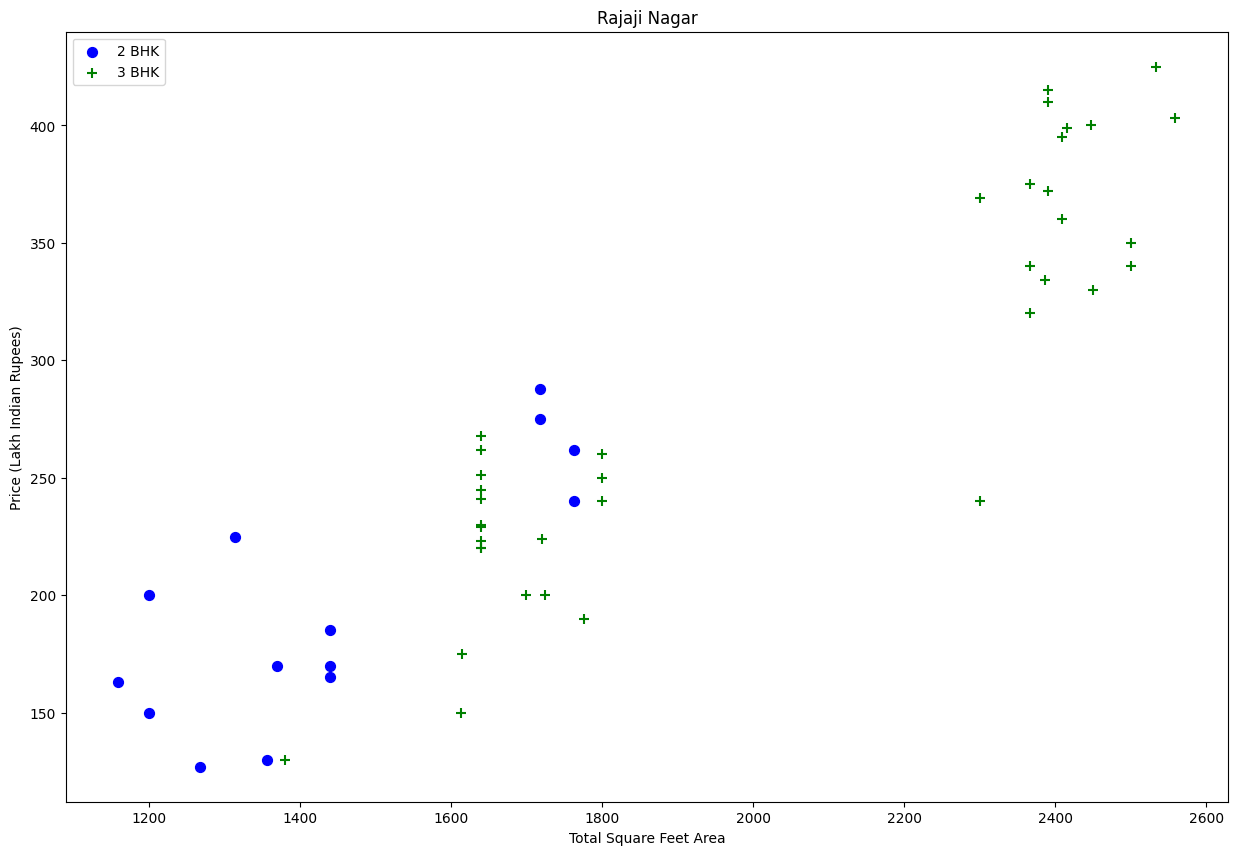

In [80]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df2,"Rajaji Nagar")

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [82]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df3 = remove_bhk_outliers(df2)
# df8 = df7.copy()
df3.shape

(7294, 8)

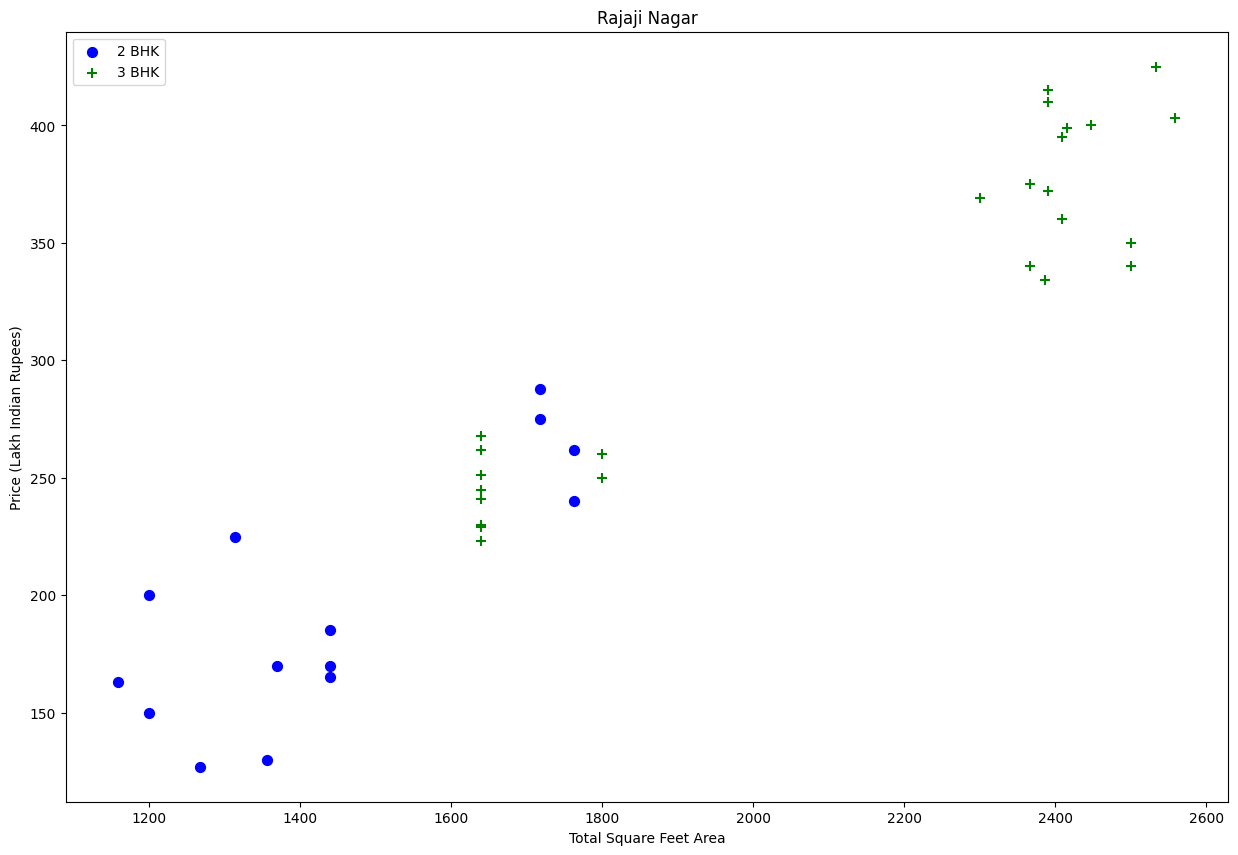

In [83]:
plot_scatter_chart(df3,"Rajaji Nagar")

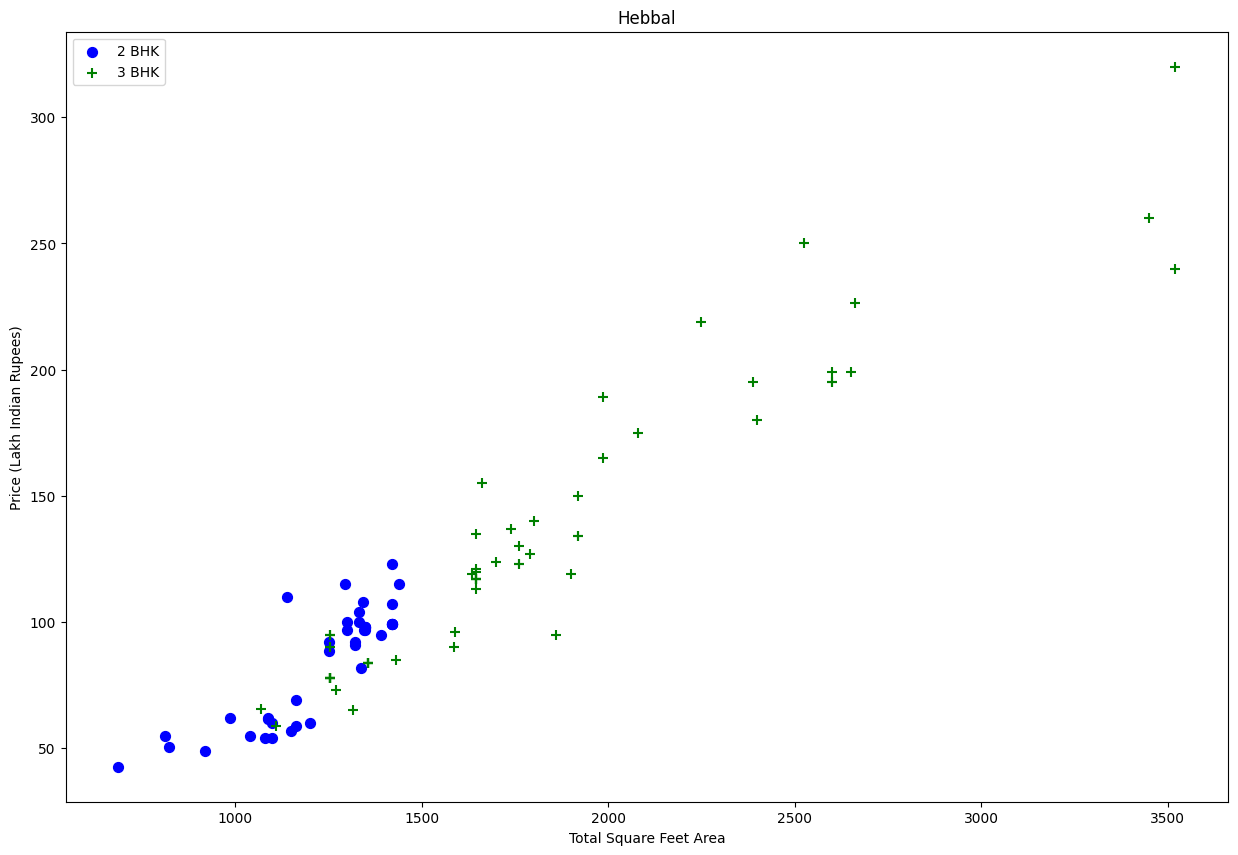

In [84]:
plot_scatter_chart(df2,"Hebbal")

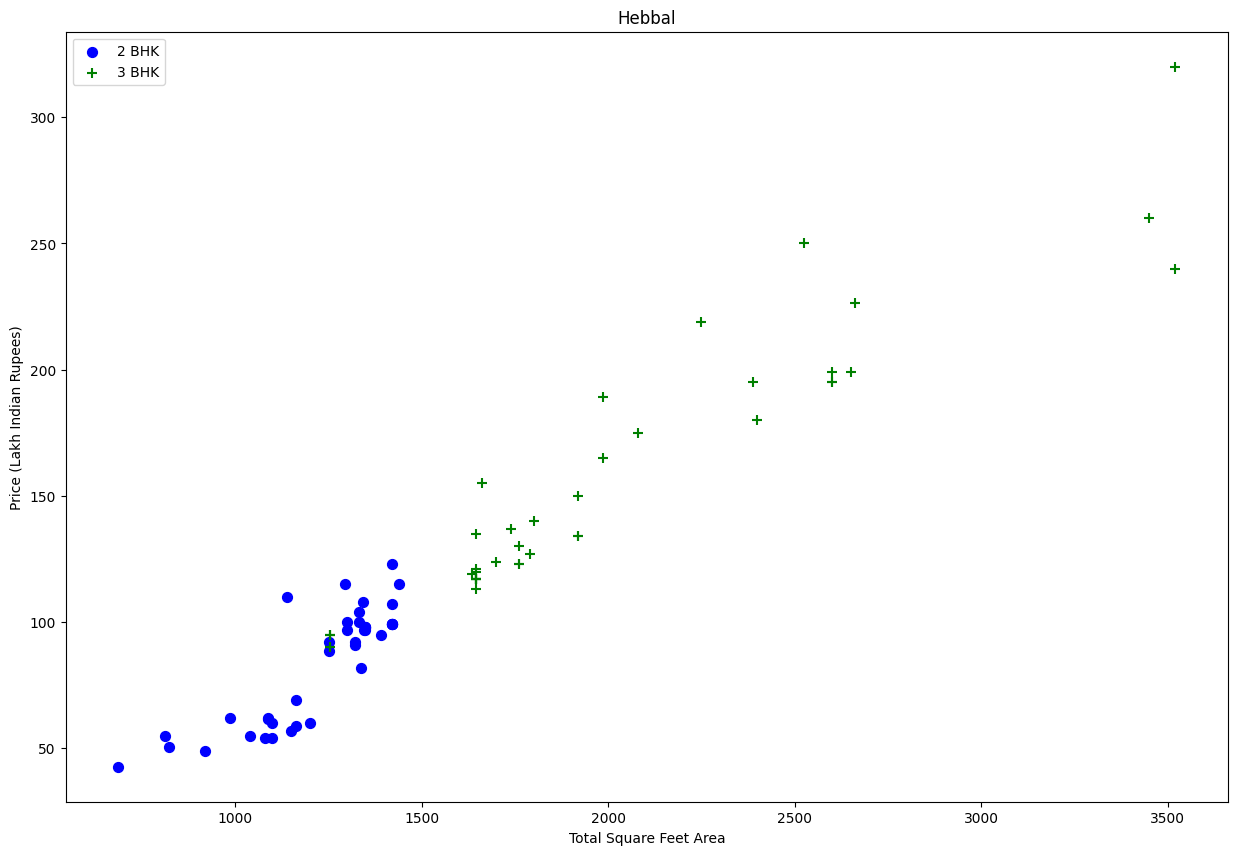

In [85]:
plot_scatter_chart(df3,"Hebbal")

In [86]:
df3.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
1,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,8906.666667
2,Built-up Area,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5,5666.666667
3,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,10169.491525
5,Super built-up Area,1st Phase JP Nagar,2059.0,3.0,2.0,225.0,3,10927.634774
6,Super built-up Area,1st Phase JP Nagar,1394.0,2.0,1.0,100.0,2,7173.601148


In [88]:
df3.area_type.unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

In [89]:
df3['area_type']=df3['area_type'].map({"Plot  Area":0,"Carpet  Area":1,"Built-up  Area":2,"Super built-up  Area":3})

In [91]:
df3.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
1,3,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,8906.666667
2,2,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5,5666.666667
3,3,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,10169.491525
5,3,1st Phase JP Nagar,2059.0,3.0,2.0,225.0,3,10927.634774
6,3,1st Phase JP Nagar,1394.0,2.0,1.0,100.0,2,7173.601148


In [93]:
location_dummies = pd.get_dummies(df3.location).astype(int)
location_dummies.head(3)

,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df4 = pd.concat([df3,location_dummies.drop('other',axis='columns')],axis='columns')
df4.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,3,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,8906.666667,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5,5666.666667,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,10169.491525,1,0,...,0,0,0,0,0,0,0,0,0,0
5,3,1st Phase JP Nagar,2059.0,3.0,2.0,225.0,3,10927.634774,1,0,...,0,0,0,0,0,0,0,0,0,0
6,3,1st Phase JP Nagar,1394.0,2.0,1.0,100.0,2,7173.601148,1,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df5=df4.drop(["location",'price_per_sqft','balcony'],axis="columns")

In [96]:
df5.head()

,area_type,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,3,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1500.0,5.0,85.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2065.0,4.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,2059.0,3.0,225.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Training

In [107]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [97]:
df5.shape

(7294, 228)

In [98]:
x=df5.drop('price',axis='columns')
y=df5.price

In [99]:
print(x.shape)
print(y.shape)

(7294, 227)
(7294,)


In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
print(x_train.shape)
print(x_test.shape)

(5835, 227)
(1459, 227)


## Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
print("Train score:",linear.score(x_train,y_train))
print("Test Score:",linear.score(x_test,y_test))
print("Mean Squared Error:",mean_squared_error(y_pred,y_test))
print("Mean Squared Error:",mean_absolute_error(y_pred,y_test))

Train score: 0.8595102097029621
Test Score: 0.8292182729375961
Mean Squared Error: 2053.367432519589
Mean Squared Error: 19.41210447805005


## Lasso 

In [109]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
print("Train score:",lasso.score(x_train,y_train))
print("Test Score:",lasso.score(x_test,y_test))
print("Mean Squared Error:",mean_squared_error(y_pred,y_test))
print("Mean Squared Error:",mean_absolute_error(y_pred,y_test))

Train score: 0.7344818636729848
Test Score: 0.6802308509234221
Mean Squared Error: 3844.6944408661625
Mean Squared Error: 26.47908790260148


## Ridge

In [110]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
print("Train score:",ridge.score(x_train,y_train))
print("Test Score:",ridge.score(x_test,y_test))
print("Mean Squared Error:",mean_squared_error(y_pred,y_test))
print("Mean Squared Error:",mean_absolute_error(y_pred,y_test))

Train score: 0.857930897721046
Test Score: 0.8219590671680654
Mean Squared Error: 2140.6473597665236
Mean Squared Error: 19.259961887685222


In [111]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
print("Train score:",dtr.score(x_train,y_train))
print("Test Score:",dtr.score(x_test,y_test))
print("Mean Squared Error:",mean_squared_error(y_pred,y_test))
print("Mean Squared Error:",mean_absolute_error(y_pred,y_test))

Train score: 0.9943048335567606
Test Score: 0.6531097554202515
Mean Squared Error: 4170.780698444028
Mean Squared Error: 23.43995627403021


### Hyperparameter Tunning

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
#Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': np.logspace(-3, 3, 10)}
ridge_search = RandomizedSearchCV(ridge, param_distributions=ridge_params, n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42)
ridge_search.fit(x_train, y_train)
print("Best Ridge Params:", ridge_search.best_params_)
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_search.predict(x_test)))
print("Ridge Regression MAE:",mean_absolute_error(y_test,ridge_search.predict(x_test)))
print("Accuracy:",ridge_search.score(x_test,y_test))

Best Ridge Params: {'alpha': 0.004641588833612777}
Ridge Regression MSE: 2053.736763217167
Ridge Regression MAE: 19.410069327953796
Accuracy: -2053.736763217167


In [118]:
#Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
dt_params = {'max_depth': [None, 5, 10, 20],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
dt_search = RandomizedSearchCV(decision_tree, param_distributions=dt_params, n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42)
dt_search.fit(x_train, y_train)
print("Best Decision Tree Params:", dt_search.best_params_)
print("Decision Tree MSE:", mean_squared_error(y_test, dt_search.predict(x_test)))
print("Decision MAE:",mean_absolute_error(y_test,dt_search.predict(x_test)))



Best Decision Tree Params: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Decision Tree MSE: 3879.5046956686947
Decision MAE: 23.497379808870846


In [119]:
# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [10, 50, 100],
             'max_depth': [None, 5, 10, 20],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
rf_search = RandomizedSearchCV(random_forest, param_distributions=rf_params, n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42)
rf_search.fit(x_train, y_train)
print("Best Random Forest Params:", rf_search.best_params_)
print("Random Forest MSE:", mean_squared_error(y_test, rf_search.predict(x_test)))
print("Random Forest MAE:",mean_absolute_error(y_test,rf_search.predict(x_test)))

Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Random Forest MSE: 2924.4134642680688
Random Forest MAE: 21.98025904257643


## Best model is Linear Regression

In [125]:
def predict_price(area_type,location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    df = np.zeros(len(x.columns))
    area={"Plot  Area":0,"Carpet  Area":1,"Built-up  Area":2,"Super built-up  Area":3}
    df[0]=area[area_type]
    df[1] = sqft
    df[2] = bath
    df[3] = bhk
    if loc_index >= 0:
        df[loc_index] = 1

    return linear.predict([df])[0]

In [128]:
predict_price("Super built-up  Area",'1st Phase JP Nagar',1875,3,3)

/home/prakash/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


158.90865020850026

## Save the model

In [129]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(linear,f)

In [130]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))